<center>
    <h1>
        Image Processing and Computer Vision
    </h1>
    <h2>
        Fruit inspection
    </h2>
</center>

<br>

<b>Student</b>: Matteo Donati <br>
<b>Registration no.</b>: 1032227 <br>
<b>E-mail</b>: matteo.donati10@studio.unibo.it

<br>

<hr>

In [1]:
# Importing cv2.
import cv2

# Importing numpy.
import numpy as np

# Importing pyplot.
from matplotlib import pyplot as plt

# Using TeX to render text.
plt.rc("text", usetex = True)

# Setting the pyplot font family.
plt.rc("font", family = "serif")

# Setting the pyplot font size.
plt.rcParams.update({"font.size": 15})

## First task

In [2]:
# Defining the filenames of gray-scale images.
gray_scale_filenames = ["C0\_000001", "C0\_000002", "C0\_000003"]

# Defining the filenames of colour images.
colour_filenames = ["C1\_000001", "C1\_000002", "C1\_000003"]

# Computing the number of images.
N_images = len(gray_scale_filenames)

# Defining the list containing gray-scale images.
gray_scale_images = []

# Defining the list containing colour images.
colour_images = []

# Reading the gray-scale images.
for i in range(N_images):
    
    # Reading the specific images.
    gray_scale_images.append(cv2.imread("images/first_task/{}.png".format(gray_scale_filenames[i].replace("\\", "")), cv2.IMREAD_GRAYSCALE))
    
    # Reading the specific images.
    colour_images.append(cv2.imread("images/first_task/{}.png".format(colour_filenames[i].replace("\\", ""))))
    
    # Converting the red image into RGB.
    colour_images[i] = cv2.cvtColor(colour_images[i], cv2.COLOR_BGR2RGB)

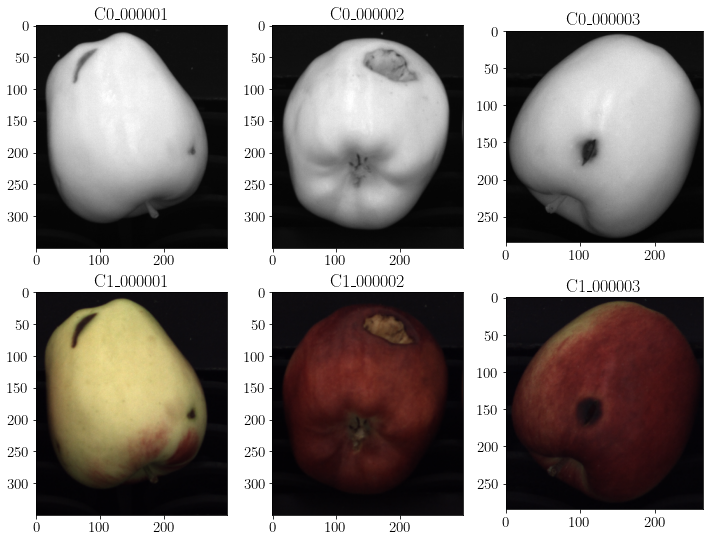

In [3]:
# Defining the figure object to be displayed.
fig, ax = plt.subplots(2, N_images, figsize = (12, 9))

# Adding each gray-scale image to the figure.
for i in range(N_images):
    
    # Adding the specific title.
    ax[0, i].set_title(gray_scale_filenames[i])
    
    # Adding the specific image to the figure.
    ax[0, i].imshow(gray_scale_images[i], cmap = "gray", vmin = 0, vmax = 255)
    
    # Adding the specific title.
    ax[1, i].set_title(colour_filenames[i])
    
    # Adding the specific image to the figure.
    ax[1, i].imshow(colour_images[i])

# Showing the figure.
plt.show()

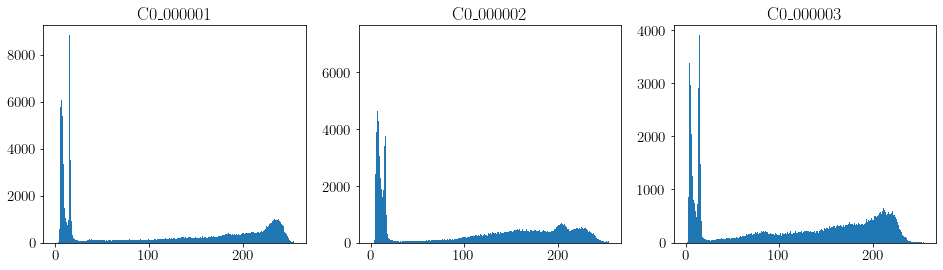

In [4]:
# Defining the figure object to be displayed.
fig, ax = plt.subplots(1, N_images, figsize = (16, 4))

# Generating the intensity histogram related to the gray-scale images.
for i in range(N_images):
    
    # Adding the specific title.
    ax[i].set_title(gray_scale_filenames[i])
    
    # Adding the histogram to the figure.
    ax[i].hist(gray_scale_images[i].flatten(), bins = range(256))

# Showing the figure.
plt.show()

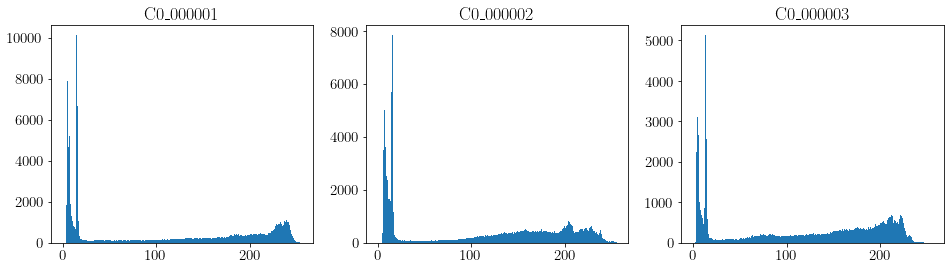

In [5]:
# List of the filtered gray-scale images.
f_gray_scale_images = []

# Defining the figure object to be displayed.
fig, ax = plt.subplots(1, N_images, figsize = (16, 4))

# Filtering the images.
for i in range(N_images):
    
    # Appending the filtered image.
    f_gray_scale_images.append(cv2.bilateralFilter(gray_scale_images[i], 5, 75, 75))
    
    # Adding the specific title.
    ax[i].set_title(gray_scale_filenames[i])
    
    # Adding the histogram of the smoothed image to the figure.
    ax[i].hist(f_gray_scale_images[i].flatten(), bins = range(256))

# Showing the figure.
plt.show()

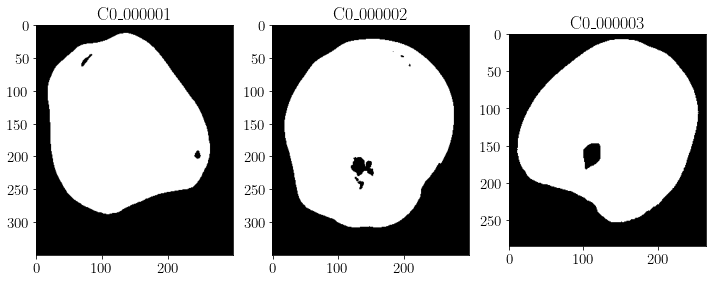

In [6]:
# List of masks.
threshold_masks = []

# Defining the figure object to be displayed.
fig, ax = plt.subplots(1, N_images, figsize = (12, 5))

# Thesholding the gray-scale images.
for i in range(N_images):
    
    # Applying Otsu's thresholding (https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html).
    threshold_value, binary_mask = cv2.threshold(f_gray_scale_images[i], 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    
    # Appending the generated binary mask.
    threshold_masks.append(binary_mask)
    
    # Adding the specific title.
    ax[i].set_title(gray_scale_filenames[i])
    
    # Plotting the computed binary mask.
    ax[i].imshow(threshold_masks[i], cmap = "gray")

# Showing the figure.
plt.show()

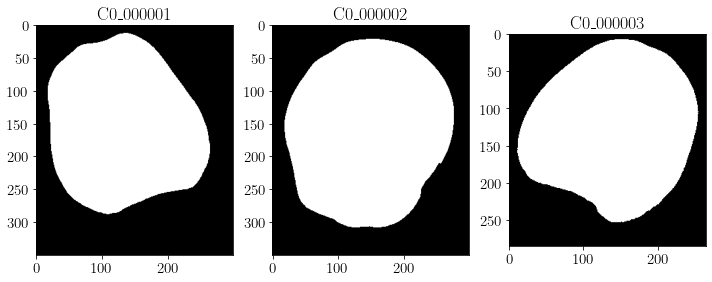

In [7]:
# List of masks.
fruit_masks = []

# Defining the figure object to be displayed.
fig, ax = plt.subplots(1, N_images, figsize = (12, 5))

# Filling the holes of the already computed masks (https://learnopencv.com/filling-holes-in-an-image-using-opencv-python-c/).
for i in range(N_images):
    
    # Copying masks[i].
    mask_copy = threshold_masks[i].copy()
    
    # Filling the holes inside the mask.
    cv2.floodFill(mask_copy, None, (0,0), 255)
    
    # Inverting the flood-filled image.
    inv = cv2.bitwise_not(mask_copy)
    
    # Adding the final mask by or-ing masks[i] and inv.
    fruit_masks.append(threshold_masks[i] | inv)
    
    # Adding the specific title.
    ax[i].set_title(gray_scale_filenames[i])
    
    # Plotting the computed binary mask.
    ax[i].imshow(fruit_masks[i], cmap = "gray")

# Showing the figure.
plt.show()

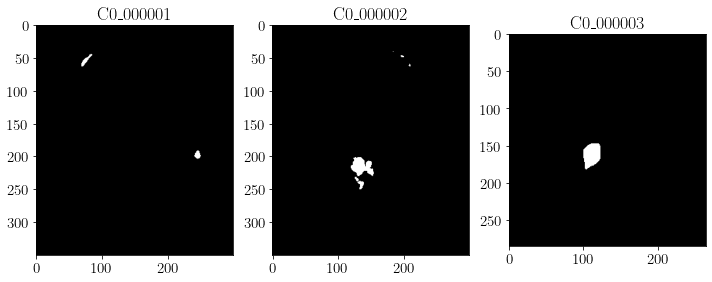

In [8]:
# Defining the figure object to be displayed.
fig, ax = plt.subplots(1, N_images, figsize = (12, 5))

# Showing the difference between the threshold masks and the fruit masks.
for i in range(N_images):
    
    # Adding the specific title.
    ax[i].set_title(gray_scale_filenames[i])
    
    # Plotting the computed binary mask.
    ax[i].imshow(threshold_masks[i] != fruit_masks[i], cmap = "gray")

# Showing the figure.
plt.show()

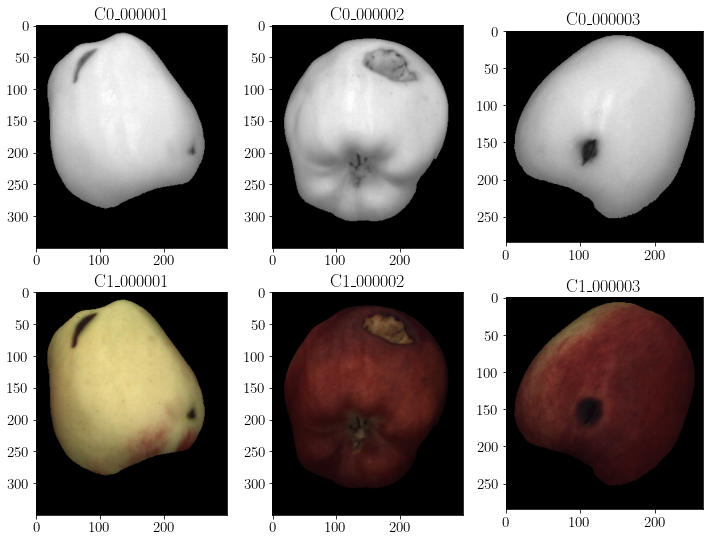

In [9]:
# List of masked gray-scale images.
m_gray_scale_images = []

# List of masked colour images.
m_colour_images = []

# Defining the figure object to be displayed.
fig, ax = plt.subplots(2, N_images, figsize = (12, 9))

# Applying the computed final masks to the original images.
for i in range(N_images):
    
    # Applying the computed mask to the specific gray-scale image.
    m_gray_scale_images.append(gray_scale_images[i] & fruit_masks[i])
    
    # Applying the computed mask to the specific colour image.
    m_colour_images.append(colour_images[i] & cv2.cvtColor(fruit_masks[i], cv2.COLOR_GRAY2BGR))
    
    # Adding the specific title.
    ax[0, i].set_title(gray_scale_filenames[i])
    
    # Adding the specific image to the figure.
    ax[0, i].imshow(m_gray_scale_images[i], cmap = "gray", vmin = 0, vmax = 255)
    
    # Adding the specific title.
    ax[1, i].set_title(colour_filenames[i])
    
    # Adding the specific image to the figure.
    ax[1, i].imshow(m_colour_images[i])

# Showing the figure.
plt.show()

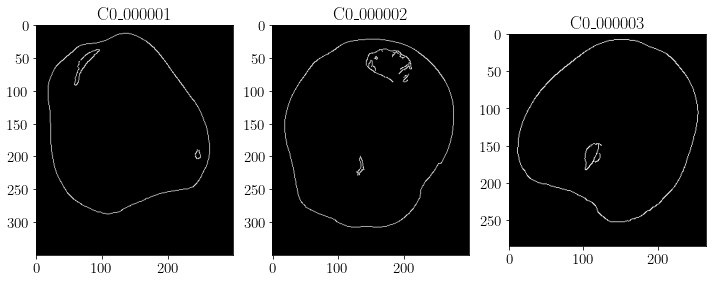

In [10]:
# List of masks.
edges = []

# Defining the figure object to be displayed.
fig, ax = plt.subplots(1, N_images, figsize = (12, 5))

# Applying Canny Edge Detector to every segmented image.
for i in range(N_images):
    
    # Applying Canny Edge Detector to the specific image. In particular, the thresholds (75, 200) are used.
    edges.append(cv2.Canny(m_gray_scale_images[i], 75, 200))
    
    # Adding the specific title.
    ax[i].set_title(gray_scale_filenames[i])
    
    # Plotting the computed binary mask.
    ax[i].imshow(edges[i], cmap = "gray")
    
# Showing the plot.
plt.show()

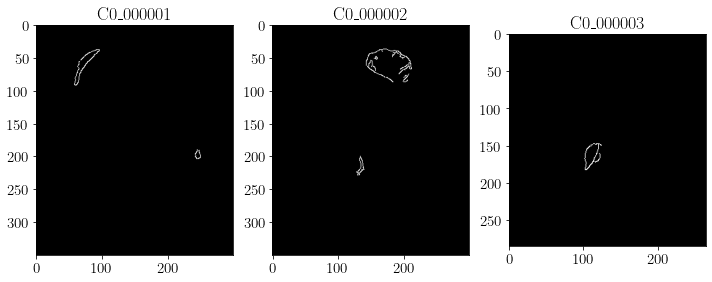

In [11]:
# List of masks.
fruit_defects = []

# Defining the figure object to be displayed.
fig, ax = plt.subplots(1, N_images, figsize = (12, 5))

# Applying erosion in order to preserve only fruit damages.
for i in range(N_images):
    
    # Computing the eroded mask.
    eroded_mask = cv2.erode(fruit_masks[i], cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5)), iterations = 1)
    
    # Updating edges[i].
    fruit_defects.append(edges[i] * eroded_mask)
    
    # Adding the specific title.
    ax[i].set_title(gray_scale_filenames[i])
    
    # Plotting the computed binary mask.
    ax[i].imshow(fruit_defects[i], cmap = "gray")
    
# Showing the plot.
plt.show()

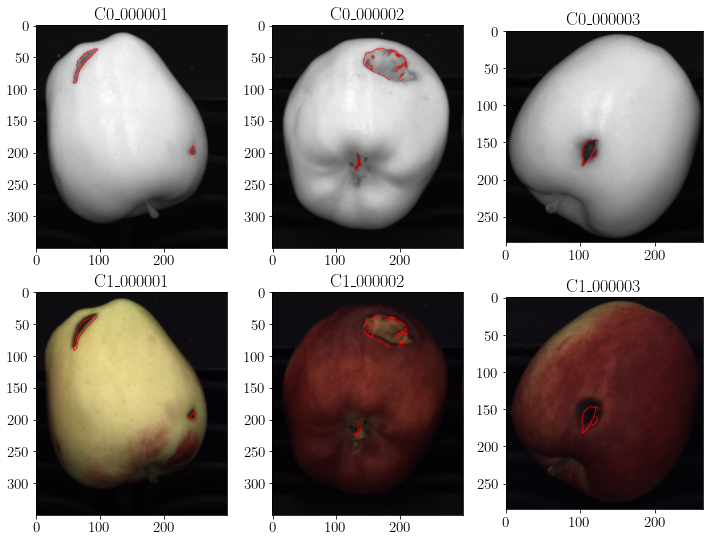

In [12]:
# Defining the figure object to be displayed.
fig, ax = plt.subplots(2, N_images, figsize = (12, 9))

# Applying the computed edges masks to the original images.
for i in range(N_images):
    
    # Converting the specific gray-scale image to RGB.
    img = cv2.cvtColor(gray_scale_images[i], cv2.COLOR_GRAY2BGR)
    
    # Traversing the horizontal axis of the image.
    for y in range(img.shape[0]):
        
        # Traversing the vertical axis of the image.
        for x in range(img.shape[1]):
            
            # Checking the value of the fruit_defects[i] mask. If this is equal to one, then the corresponding img pixel gets coloured.
            if(fruit_defects[i][y][x]):
                
                # Colouring the temporary RGB img.
                img[y][x][0] = 255
                img[y][x][1] = 0
                img[y][x][2] = 0
    
    # Adding the specific title.
    ax[0, i].set_title(gray_scale_filenames[i])
    
    # Adding the specific image to the figure.
    ax[0, i].imshow(img)
    
    # Copying the specific colour image.
    img = colour_images[i].copy()
    
    # Traversing the horizontal axis of the image.
    for y in range(img.shape[0]):
        
        # Traversing the vertical axis of the image.
        for x in range(img.shape[1]):
            
            # Checking the value of the fruit_defects[i] mask. If this is equal to one, then the corresponding img pixel gets coloured.
            if(fruit_defects[i][y][x]):
                
                # Colouring the temporary RGB img.
                img[y][x][0] = 255
                img[y][x][1] = 0
                img[y][x][2] = 0
    
    # Adding the specific title.
    ax[1, i].set_title(colour_filenames[i])
    
    # Adding the specific image to the figure.
    ax[1, i].imshow(img)

# Showing the figure.
plt.show()

## Second task

In [13]:
# Defining the filenames of gray-scale images.
gray_scale_filenames = ["C0\_000004", "C0\_000005"]

# Defining the filenames of colour images.
colour_filenames = ["C1\_000004", "C1\_000005"]

# Computing the number of images.
N_images = len(gray_scale_filenames)

# Defining the list containing gray-scale images.
gray_scale_images = []

# Defining the list containing colour images.
colour_images = []

# Reading the gray-scale images.
for i in range(N_images):
    
    # Reading the specific images.
    gray_scale_images.append(cv2.imread("images/second_task/{}.png".format(gray_scale_filenames[i].replace("\\", "")), cv2.IMREAD_GRAYSCALE))
    
    # Reading the specific images.
    colour_images.append(cv2.imread("images/second_task/{}.png".format(colour_filenames[i].replace("\\", ""))))
    
    # Converting the red image into RGB.
    colour_images[i] = cv2.cvtColor(colour_images[i], cv2.COLOR_BGR2RGB)

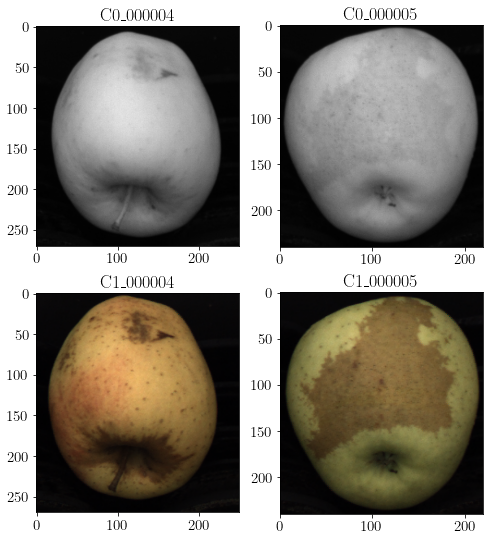

In [14]:
# Defining the figure object to be displayed.
fig, ax = plt.subplots(2, N_images, figsize = (8, 9))

# Adding each gray-scale image to the figure.
for i in range(N_images):
    
    # Adding the specific title.
    ax[0, i].set_title(gray_scale_filenames[i])
    
    # Adding the specific image to the figure.
    ax[0, i].imshow(gray_scale_images[i], cmap = "gray", vmin = 0, vmax = 255)
    
    # Adding the specific title.
    ax[1, i].set_title(colour_filenames[i])
    
    # Adding the specific image to the figure.
    ax[1, i].imshow(colour_images[i])

# Showing the figure.
plt.show()

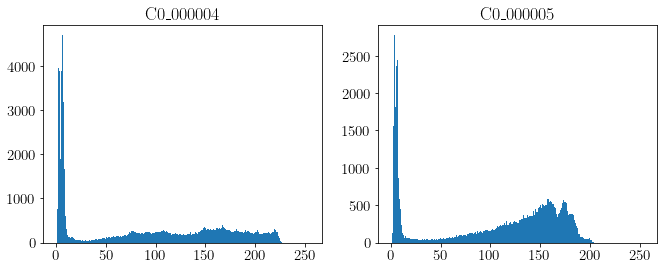

In [15]:
# List of the filtered gray-scale images.
f_gray_scale_images = []

# Defining the figure object to be displayed.
fig, ax = plt.subplots(1, N_images, figsize = (11, 4))

# Filtering the images.
for i in range(N_images):
    
    # Appending the filtered image.
    f_gray_scale_images.append(cv2.bilateralFilter(gray_scale_images[i], 5, 75, 75))
    
    # Adding the specific title.
    ax[i].set_title(gray_scale_filenames[i])
    
    # Adding the histogram of the smoothed image to the figure.
    ax[i].hist(f_gray_scale_images[i].flatten(), bins = range(256))

# Showing the figure.
plt.show()

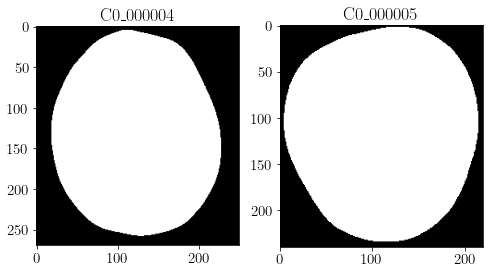

In [16]:
# List of masks.
fruit_masks = []

# Defining the figure object to be displayed.
fig, ax = plt.subplots(1, N_images, figsize = (8, 5))

# Thesholding the gray-scale images.
for i in range(N_images):
    
    # Appending the filtered image.
    f_gray_scale_images.append(cv2.bilateralFilter(gray_scale_images[i], 5, 75, 75))
    
    # Applying Otsu's thresholding (https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html).
    threshold_value, binary_mask = cv2.threshold(f_gray_scale_images[i], 25, 255, cv2.THRESH_BINARY)
    
    # Appending the generated binary mask.
    fruit_masks.append(binary_mask)
    
    # Adding the specific title.
    ax[i].set_title(gray_scale_filenames[i])
    
    # Plotting the computed binary mask.
    ax[i].imshow(fruit_masks[i], cmap = "gray")

# Showing the figure.
plt.show()

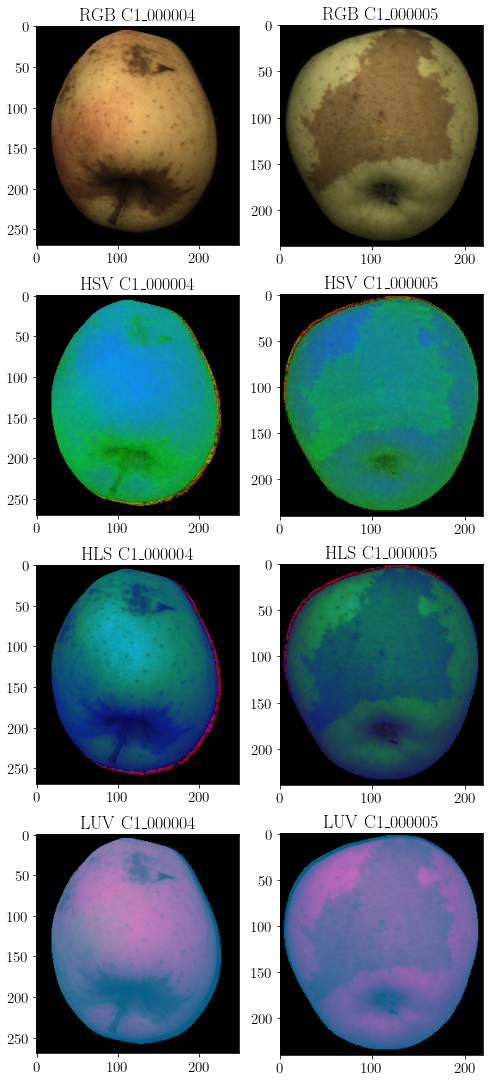

In [17]:
# List of masked RGB images.
m_RGB_images = []

# List of masked HSV images.
m_HSV_images = []

# List of masked HLS images.
m_HLS_images = []

# List of masked LUV images.
m_LUV_images = []

# Defining the figure object to be displayed.
fig, ax = plt.subplots(4, N_images, figsize = (8, 19))

# Thesholding the gray-scale images.
for i in range(N_images):
    
    # Applying the computed mask to the specific colour image.
    m_RGB_images.append(colour_images[i] & cv2.cvtColor(fruit_masks[i], cv2.COLOR_GRAY2BGR))
    
    # Adding the specific title.
    ax[0, i].set_title("RGB " + colour_filenames[i])
    
    # Plotting the computed binary mask.
    ax[0, i].imshow(m_RGB_images[i], cmap = "gray")
    
    # Computing the corresponding HSV image.
    m_HSV_images.append(cv2.cvtColor(colour_images[i], cv2.COLOR_RGB2HSV))
    
    # Applying the computed mask to the specific HSV image.
    m_HSV_images[i] = m_HSV_images[i] & cv2.cvtColor(fruit_masks[i], cv2.COLOR_GRAY2BGR)
    
    # Adding the specific title.
    ax[1, i].set_title("HSV " + colour_filenames[i])
    
    # Plotting the computed binary mask.
    ax[1, i].imshow(m_HSV_images[i], cmap = "gray")
    
    # Computing the corresponding HSL image.
    m_HLS_images.append(cv2.cvtColor(colour_images[i], cv2.COLOR_RGB2HLS))
    
    # Applying the computed mask to the specific HLS image.
    m_HLS_images[i] = m_HLS_images[i] & cv2.cvtColor(fruit_masks[i], cv2.COLOR_GRAY2BGR)
    
    # Adding the specific title.
    ax[2, i].set_title("HLS " + colour_filenames[i])
    
    # Plotting the computed binary mask.
    ax[2, i].imshow(m_HLS_images[i], cmap = "gray")
    
    # Computing the corresponding LUV image.
    m_LUV_images.append(cv2.cvtColor(colour_images[i], cv2.COLOR_RGB2LUV))
    
    # Applying the computed mask to the specific LUV image.
    m_LUV_images[i] = m_LUV_images[i] & cv2.cvtColor(fruit_masks[i], cv2.COLOR_GRAY2BGR)
    
    # Adding the specific title.
    ax[3, i].set_title("LUV " + colour_filenames[i])
    
    # Plotting the computed binary mask.
    ax[3, i].imshow(m_LUV_images[i], cmap = "gray")

# Showing the figure.
plt.show()

In [34]:
print("RGB: L2-norm between means: {}".format(np.linalg.norm(np.mean(m_RGB_images[0], axis = (0, 1)) - np.mean(m_RGB_images[1], axis = (0, 1)))))
print("HSV: L2-norm between means: {}".format(np.linalg.norm(np.mean(m_HSV_images[0], axis = (0, 1)) - np.mean(m_HSV_images[1], axis = (0, 1)))))
print("HLS: L2-norm between means: {}".format(np.linalg.norm(np.mean(m_HLS_images[0], axis = (0, 1)) - np.mean(m_HLS_images[1], axis = (0, 1)))))
print("LUV: L2-norm between means: {}".format(np.linalg.norm(np.mean(m_LUV_images[0], axis = (0, 1)) - np.mean(m_LUV_images[1], axis = (0, 1)))))

print(m_HSV_images[0].shape)

RGB: L2-norm between means: 13.329650370050766
HSV: L2-norm between means: 6.465418324108617
HLS: L2-norm between means: 10.964846737601102
LUV: L2-norm between means: 21.70688149242441
(270, 250, 3)


In [22]:
# List of mean values.
mean_values = []

# Computing the mean value of each channel in the HSV color space.
for i in range(N_images):
    
    # Computing the mean value of each channel of the i-th image.
    mean_values.append(np.mean(m_HSV_images[i], axis = (0, 1)))
    
# Computing the mean of mean_values on axis zero.    
ref = np.mean(mean_values, axis = 0)

In [50]:
def inv_cov(img, mean):
    
    reshaped_img = img.reshape((img.shape[0] * img.shape[1], img.shape[2]))

    rr = 0
    rg = 0
    rb = 0
    gg = 0
    gb = 0
    bb = 0

    for px in range(reshaped_img.shape[0]):

        r = reshaped_img[px, 0]
        g = reshaped_img[px, 1]
        b = reshaped_img[px, 2]

        dr = r - mean[0]
        dg = g - mean[1]
        db = b - mean[2]

        rr += dr ** 2
        rg += dr * dg
        rb += dr * db

        gg += dg ** 2
        gb += dg * db

        bb += db ** 2

    # Number of pixels.
    N_pixels = reshaped_img.shape[0]

    rr /= N_pixels
    rg /= N_pixels
    rb /= N_pixels
    gg /= N_pixels
    gb /= N_pixels
    bb /= N_pixels
    
    cov = np.array([[rr, rg, rb], [rg, gg, gb], [rb, gb, bb]])

    # Returning the covariance matrix.
    return np.linalg.inv(cov)

# List of covariance matrices.
inv_covs = []

# Computing the covariance matrix of the two HSV images.
for i in range(N_images):
    
    # Computing the covariance matrix of the i-th image.
    inv_covs.append(inv_cov(m_HSV_images[i], ref))
    
print(inv_covs)

[array([[ 0.00307833, -0.0004316 ,  0.0001299 ],
       [-0.0004316 ,  0.00050813, -0.0003485 ],
       [ 0.0001299 , -0.0003485 ,  0.00040991]]), array([[ 0.00488612, -0.00090831,  0.00019408],
       [-0.00090831,  0.00117202, -0.00093147],
       [ 0.00019408, -0.00093147,  0.00112559]])]


## Final challenge